# Task1
## A-star Search
## Heuristic = Manhattan distance
### Case-1

In [1]:
import numpy as np
import cv2
import heapq
import time

In [13]:
start1 = time.time()

def distance(node1, node2):
    return np.sqrt((node2[0] - node1[0]) ** 2 + (node2[1] - node1[1]) ** 2)

#manhattan distance heuristic
def heuristic(node, end):
    return abs(end[0] - node[0]) + abs(end[1] - node[1])

def AStarSearch(maze, start, end):
    
    #movement can take place in 4 directions(up, down, left, right)
    neighbors = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    
    #to keep track of explored nodes
    close_list = []
    
    #to keep track of parent nodes
    parent_node = {}
    
    #gscore, fscore dictionaries
    gscore = {start: 0}
    fscore = {start: heuristic(start, end)}
    
    #all the nodes being considered for the shortest path
    open_list = []
    
    heapq.heappush(open_list, (fscore[start],start))
    
    while open_list:
        
        #heappop will return item with smallest fscore
        current = heapq.heappop(open_list)[1]
        if current == end:
            #final nodes for shortest distance calculation
            path = []
            
            #print final cost of path to reach end node
            print(f"Path cost = {fscore[current]}")

            #final path must contain all parents till start node
            while current in parent_node:
                path.append(current)
                current = parent_node[current]
            return path, close_list, open_list 
        
        close_list.append(current)
        
        #search the neighbors of current node
        for (i,j) in neighbors:
                        
            neighbor = (current[0] + i, current[1] + j)
            
            #new gscore calculation for neighbours
            new_gscore = gscore[current] + distance(current, neighbor)
            
            #check if neighbours outside maze or if they are obstacles(black squares)
            if (neighbor[0]>=0) and (neighbor[0]<maze.shape[0]):
                
            
                if (neighbor[1]>=0) and (neighbor[1]< maze.shape[1]):
                    
                    if maze[neighbor[0]][neighbor[1]] == 1:
                        
                        #this neighbour is an obstacle (black square), check other neighbors
                        continue
                        
                #y-coordinate of this neighbour outside maze, check other neighbors
                else:
                    continue
                    
            #x-coordinate of this neighbour outside maze, check other neighbors
            else:
                continue
                
            # if neighbour has already been explored(in close list) and its new gscore is greater than what it was before check other neighbors
            if neighbor in close_list and new_gscore >= gscore.get(neighbor, 0):
                continue
            
            # if neighbors new gscore is less than before or it is unexplored (not in open list), add to open list
            if new_gscore < gscore.get(neighbor, 0) or neighbor not in [i[1] for i in open_list]:
                parent_node[neighbor] = current 
                gscore[neighbor] = new_gscore
                fscore[neighbor] = new_gscore + heuristic(neighbor, end)
                heapq.heappush(open_list, (fscore[neighbor], neighbor))

    return False, close_list, open_list




def drawpath(im, path, close_list, open_list, thickness=1):
    # get all path vertices
    x0 = path[0][0]
    y0 = path[0][1]

    # explored nodes in orange
    for vertex in close_list:
        xc = vertex[0]
        yc = vertex[1]
        im[yc][xc] = [0, 165, 255]
        
    for vertex in open_list:
        xol = vertex[1][0]
        yol = vertex[1][1]
        im[yol][xol] = [0, 255, 0]

    # final path in blue
    for vertex in path[1:]:
        x1 = vertex[0]
        y1 = vertex[1]
        cv2.line(im, (x0, y0), (x1, y1), (255, 0, 0), thickness)
        x0, y0 = vertex
        
        
#get image
im = cv2.imread('Task_1_Low.png')

startCol = [113, 204, 45]
endCol = [60, 76, 231]
navigableCol = [0, 0, 0]
obstacleCol = [255, 255, 255]

#get b, g, r values of start, end, navigable, obstacle cols
bs, gs, rs = startCol
be, ge, re = endCol
bn, gn, rn = navigableCol
bo, go, ro = obstacleCol

#get dimensions of image
imrows, imcols = im.shape[0], im.shape[1]

#create matrix of same dimensions as image
maze = np.full((imrows, imcols), None)

for r in range(imrows):
    for c in range(imcols):
        bi, gi, ri = im[r][c]
        
        # get start coordinate 
        if ((bi == bs) and (gi == gs) and (ri == rs)):
            start = (c, r)
        
        # get end coordinate
        if ((bi == be) and (gi == ge) and (ri == re)):
            end = (c,r)
        
        # for navigable pixels set element value = 0
        if ((bi == bn) and (gi == gn) and (ri == rn)):
            maze[c][r] = 0

        # for obstacle pixels set elemet value = 1
        elif ((bo == bi) and (go == gi) and (ro == ri)):
            maze[c][r] = 1
        
        # for start and end pixels set element value = 0
        else:
            maze[c][r] = 0
            
route, close_list, open_list = AStarSearch(maze, start, end)

#add start node to route list
route = route + [start]


drawpath(im, route, close_list, open_list)

#print total time required to find and draw path
end1 = time.time()
print(f'Run time in seconds = {end1 - start1} seconds')

#output upscaled image
#using nearest neighor interpolation method
def nearest_neighbour_interpolation(img, new_height, new_width):
    height, width, channels = img.shape
    
    #initialize upscaled image with all 0's
    upscaledImage = np.zeros((new_height, new_width, channels), np.uint8)
    #scaling factor for height and width
    scale_h = new_height / height
    scale_w = new_width / width
    #loop through pixels of final upscaled image 
    for i in range(new_height):
        for j in range(new_width):
            #corresponing to scale factor set pixel values to final image from source image
            x = int(i / scale_h)
            y = int(j / scale_w)
            upscaledImage[i, j] = img[x, y]
    return upscaledImage

upscaledImage = nearest_neighbour_interpolation(im, 1000, 1000)
cv2.imshow("image",upscaledImage)
k = cv2.waitKey(0)

if (k == 27):
    cv2.destroyAllWindows()

elif (k == ord('s')):
    cv2.imwrite('image5.png',upscaledImage)
    cv2.destroyAllWindows()

cv2.waitKey(0)
cv2.destroyAllWindows()

Path cost = 181.0
Run time in seconds = 1.6416995525360107 seconds


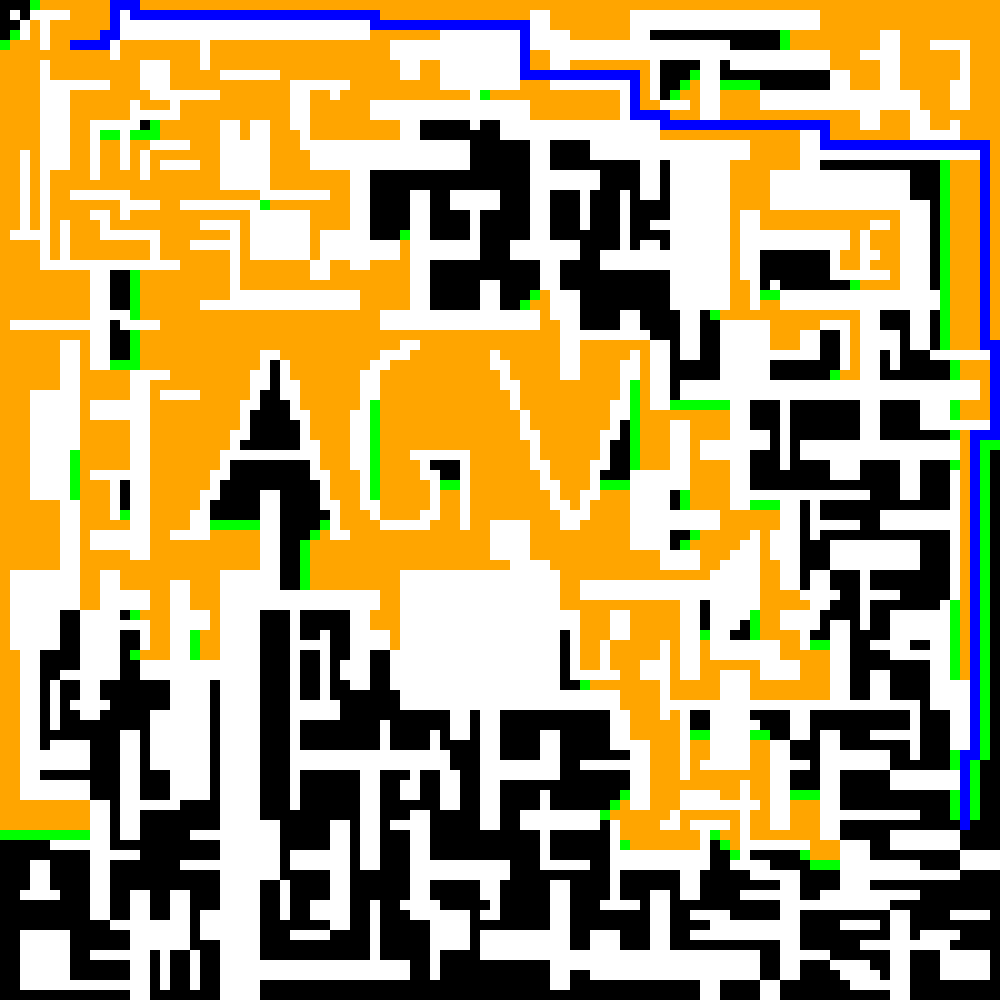

### Case-2

In [11]:
start2 = time.time()

def distance(node1, node2):
    return np.sqrt((node2[0] - node1[0]) ** 2 + (node2[1] - node1[1]) ** 2)

#manhattan distance heuristic
def heuristic(node, end):
    return abs(end[0] - node[0])+abs(end[1] - node[1])

def AStarSearch(maze, start, end):
    
    #movement can take place in 4 directions(up, down, left, right)
    neighbors = [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)]
    
    #to keep track of explored nodes
    close_list = []
    
    #to keep track of parent nodes
    parent_node = {}
    
    #gscore, fscore dictionaries
    gscore = {start: 0}
    fscore = {start: heuristic(start, end)}
    
    #all the nodes being considered for the shortest path
    open_list = []
    
    heapq.heappush(open_list, (fscore[start],start))
    
    while open_list:
        
        #heappop will return item with smallest fscore
        current = heapq.heappop(open_list)[1]
        if current == end:
            #final nodes for shortest distance calculation
            path = []
            
            #print final cost of path to reach end node
            print(f"Path cost = {fscore[current]}")
            
            #final path must contain all parents till start node
            while current in parent_node:
                path.append(current)
                current = parent_node[current]
            return path, close_list, open_list
        
        close_list.append(current)
        
        #search the neighbors of current node
        for (i,j) in neighbors:
                        
            neighbor = (current[0] + i, current[1] + j)
            
            #new gscore calculation for neighbours
            new_gscore = gscore[current] + distance(current, neighbor)
            
            #check if neighbours outside maze or if they are obstacles(black squares)
            if (neighbor[0]>=0) and (neighbor[0]<maze.shape[0]):
                
            
                if (neighbor[1]>=0) and (neighbor[1]< maze.shape[1]):
                    
                    if maze[neighbor[0]][neighbor[1]] == 1:
                        
                        #this neighbour is an obstacle (black square), check other neighbors
                        continue
                        
                #y-coordinate of this neighbour outside maze, check other neighbors
                else:
                    continue
                    
            #x-coordinate of this neighbour outside maze, check other neighbors
            else:
                continue
                
            # if neighbour has already been explored(in close list) and its new gscore is greater than what it was before check other neighbors
            if neighbor in close_list and new_gscore >= gscore.get(neighbor, 0):
                continue
            
            # if neighbors new gscore is less than before or it is unexplored (not in open list), add to open list
            if new_gscore < gscore.get(neighbor, 0) or neighbor not in [i[1] for i in open_list]:
                parent_node[neighbor] = current 
                gscore[neighbor] = new_gscore
                fscore[neighbor] = new_gscore + heuristic(neighbor, end)
                heapq.heappush(open_list, (fscore[neighbor], neighbor))

    return False, close_list, open_list



def drawRoute(im, path, close_list, thickness=1):
    #get all path vertices
    x0 = path[0][0]
    y0 = path[0][1]

    #explored nodes in orange
    for vertex in close_list:
        xc = vertex[0]
        yc = vertex[1]
        im[yc][xc] = [0,165,255]
    
    #final path in blue
    for vertex in path[1:]:
        x1 = vertex[0]
        y1 = vertex[1]
        cv2.line(im, (x0, y0), (x1, y1), (255, 0, 0), thickness)
        x0, y0 = vertex
#get image
im = cv2.imread('Task_1_Low.png')

startCol = [113, 204, 45]
endCol = [60, 76, 231]
navigableCol = [0, 0, 0]
obstacleCol = [255, 255, 255]

#get b, g, r values of start, end, navigable, obstacle cols
bs, gs, rs = startCol
be, ge, re = endCol
bn, gn, rn = navigableCol
bo, go, ro = obstacleCol

#get dimensions of image
imrows, imcols = im.shape[0], im.shape[1]

#create matrix of same dimensions as image
maze = np.full((imrows, imcols), None)

for r in range(imrows):
    for c in range(imcols):
        bi, gi, ri = im[r][c]
        
        # get start coordinate 
        if ((bi == bs) and (gi == gs) and (ri == rs)):
            start = (c, r)
        
        # get end coordinate
        if ((bi == be) and (gi == ge) and (ri == re)):
            end = (c,r)
        
        # for navigable pixels set element value = 0
        if ((bi == bn) and (gi == gn) and (ri == rn)):
            maze[c][r] = 0

        # for obstacle pixels set elemet value = 1
        elif ((bo == bi) and (go == gi) and (ro == ri)):
            maze[c][r] = 1
        
        # for start and end pixels set element value = 0
        else:
            maze[c][r] = 0
            
route, close_list, open_list = AStarSearch(maze, start, end)

#add start node to route list
route = route + [start]


drawpath(im, route, close_list, open_list)

#print total time required to find and draw path
end2 = time.time()
print(f'Run time in seconds = {end2 - start2} seconds')

#output upscaled image
#using nearest neighor interpolation method
def nearest_neighbour_interpolation(img, new_height, new_width):
    height, width, channels = img.shape
    
    #initialize upscaled image with all 0's
    upscaledImage = np.zeros((new_height, new_width, channels), np.uint8)
    #scaling factor for height and width
    scale_h = new_height / height
    scale_w = new_width / width
    #loop through pixels of final upscaled image 
    for i in range(new_height):
        for j in range(new_width):
            #corresponing to scale factor set pixel values to final image from source image
            x = int(i / scale_h)
            y = int(j / scale_w)
            upscaledImage[i, j] = img[x, y]
    return upscaledImage

upscaledImage = nearest_neighbour_interpolation(im, 1000, 1000)
cv2.imshow("image",upscaledImage)
k = cv2.waitKey(0)

if (k == 27):
    cv2.destroyAllWindows()

elif (k == ord('s')):
    cv2.imwrite('image6.png',upscaledImage)
    cv2.destroyAllWindows()

cv2.waitKey(0)
cv2.destroyAllWindows()

Path cost = 147.61017305526636
Run time in seconds = 0.2750232219696045 seconds


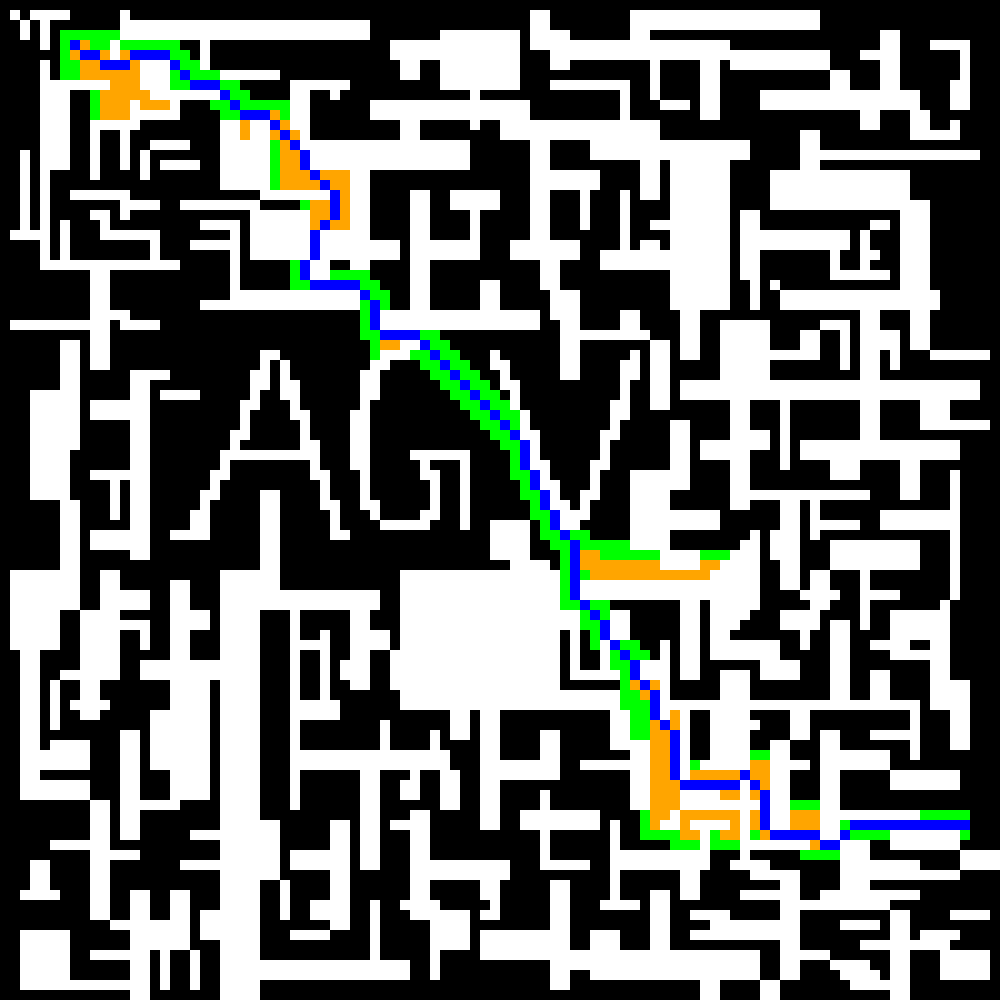